In [715]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [716]:
missing_val = ' ?'

In [717]:
# Reading the csv file to get the data
ds = pd.read_csv('Census.csv', header = None, na_values = missing_val)
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [718]:
ds.columns = ['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
             'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Goal']

In [719]:
ds.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Goal                 0
dtype: int64

In [720]:
ds.isna().sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Goal                 0
dtype: int64

In [721]:
ds.dropna(inplace=True)

In [722]:
ds.shape

(30162, 15)

In [723]:
print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (30162, 15)
Shape of dataset after removing duplicates:  (30139, 15)


# Summarize the 'Goal' distribution

In [724]:
from collections import Counter

target = ds.values[:,-1]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Loan_Status =%s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Loan_Status = <=50K, Count=22633, Percentage=75.095%
Loan_Status = >50K, Count=7506, Percentage=24.905%


In [725]:
# Checking the columns of the dataset
ds.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Goal'],
      dtype='object')

In [726]:
# Checking the datatypes of the columns
ds.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Goal              object
dtype: object

In [727]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  Goal            30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [728]:
# checking the number data type columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [729]:
# checking the category data type columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Goal'],
      dtype='object')

# Checking the unique values of the columns

In [730]:
ds['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [731]:
ds['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [732]:
ds['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [733]:
ds['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [734]:
ds['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [735]:
ds['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [736]:
ds['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [737]:
ds['Goal'].unique()

array([' <=50K', ' >50K'], dtype=object)

# Checking the 'Goal' based on a particular columns

In [738]:
ds.groupby(['Goal'])['native-country'].count()

Goal
 <=50K    22633
 >50K      7506
Name: native-country, dtype: int64

In [739]:
ds.groupby(['sex'])['Goal'].count()

sex
 Female     9773
 Male      20366
Name: Goal, dtype: int64

In [740]:
ds.groupby(['workclass'])['Goal'].count()

workclass
 Federal-gov           943
 Local-gov            2067
 Private             22264
 Self-emp-inc         1074
 Self-emp-not-inc     2498
 State-gov            1279
 Without-pay            14
Name: Goal, dtype: int64

In [741]:
ds.groupby(['education'])['Goal'].count()

education
 10th             820
 11th            1048
 12th             377
 1st-4th          149
 5th-6th          287
 7th-8th          556
 9th              455
 Assoc-acdm      1008
 Assoc-voc       1307
 Bachelors       5042
 Doctorate        375
 HS-grad         9834
 Masters         1626
 Preschool         44
 Prof-school      542
 Some-college    6669
Name: Goal, dtype: int64

In [742]:
ds.groupby(['occupation'])['Goal'].count()

occupation
 Adm-clerical         3719
 Armed-Forces            9
 Craft-repair         4025
 Exec-managerial      3991
 Farming-fishing       987
 Handlers-cleaners    1349
 Machine-op-inspct    1964
 Other-service        3209
 Priv-house-serv       141
 Prof-specialty       4034
 Protective-serv       644
 Sales                3584
 Tech-support          911
 Transport-moving     1572
Name: Goal, dtype: int64

In [743]:
ds.groupby(['marital-status'])['Goal'].count()

marital-status
 Divorced                  4212
 Married-AF-spouse           21
 Married-civ-spouse       14059
 Married-spouse-absent      370
 Never-married             9711
 Separated                  939
 Widowed                    827
Name: Goal, dtype: int64

# Countplot for features

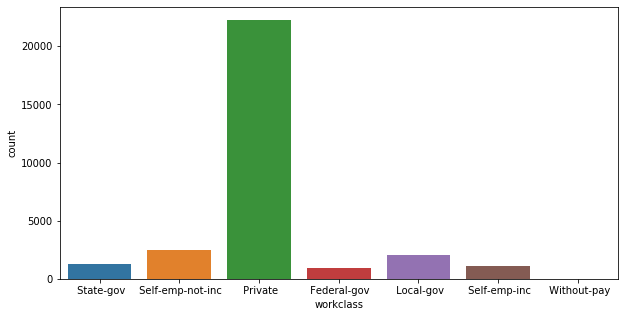

In [744]:
plt.figure (figsize=(10,5))
sns.countplot(ds['workclass'])
plt.show()

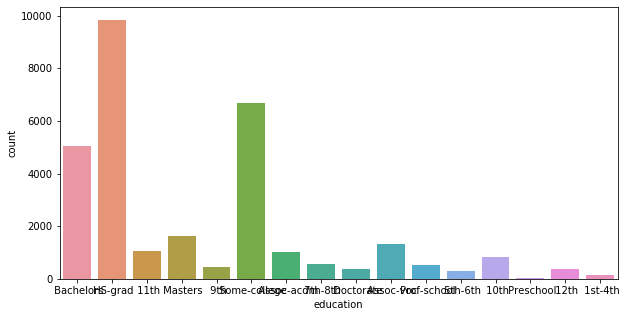

In [745]:
plt.figure (figsize=(10,5))
sns.countplot(ds['education'])
plt.show()

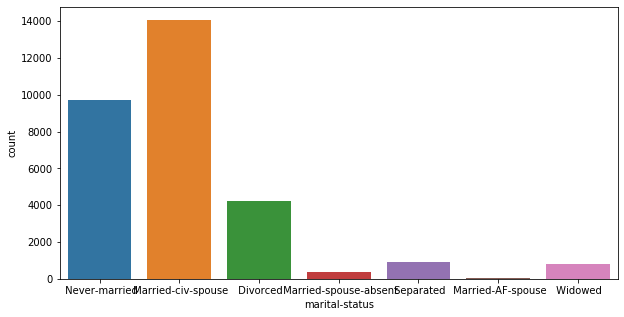

In [746]:
plt.figure (figsize=(10,5))
sns.countplot(ds['marital-status'])
plt.show()

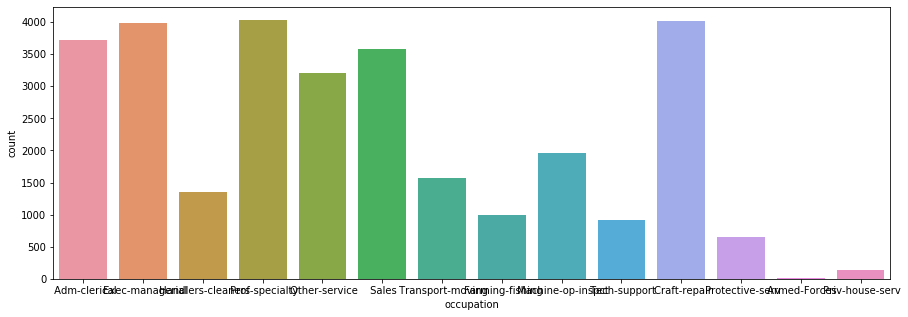

In [747]:
plt.figure (figsize=(15,5))
sns.countplot(ds['occupation'])
plt.show()

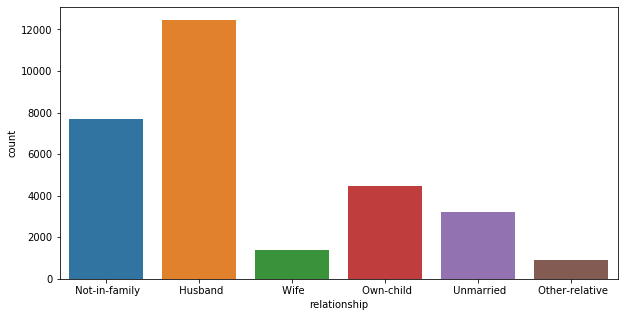

In [748]:
plt.figure (figsize=(10,5))
sns.countplot(ds['relationship'])
plt.show()

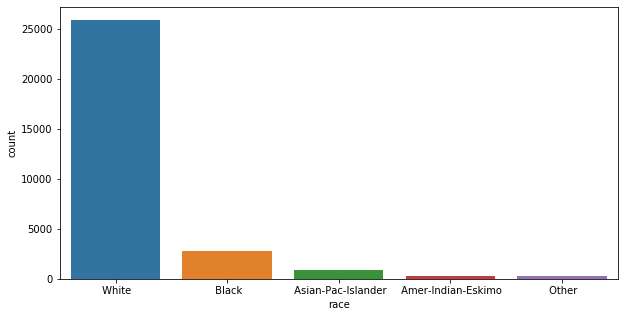

In [749]:
plt.figure (figsize=(10,5))
sns.countplot(ds['race'])
plt.show()

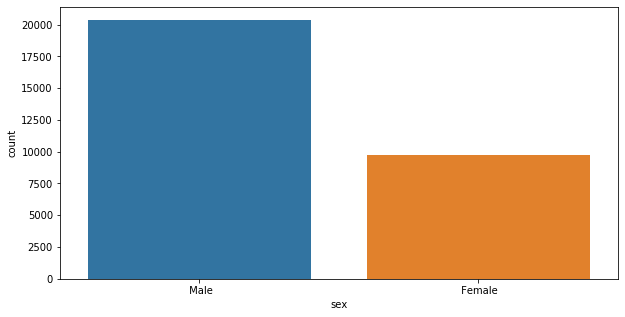

In [750]:
plt.figure (figsize=(10,5))
sns.countplot(ds['sex'])
plt.show()

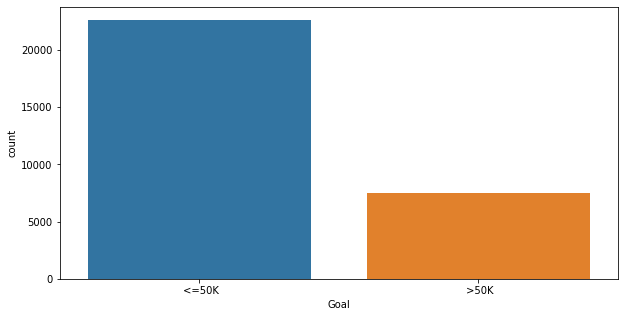

In [751]:
plt.figure (figsize=(10,5))
sns.countplot(ds['Goal'])
plt.show()

# Statistical Summary

In [752]:
ds.describe()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [753]:
ds.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Goal              0
dtype: int64

In [754]:
ds.isna().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Goal              0
dtype: int64

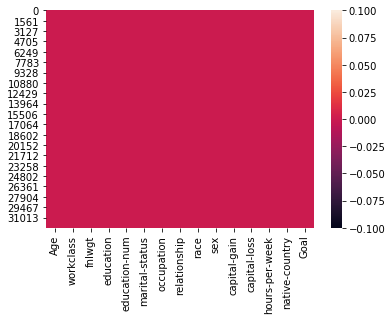

In [755]:
# Checking the null values through heatmap visualization
sns.heatmap(ds.isnull())

# Checking the Corelation

In [756]:
ds.corr()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


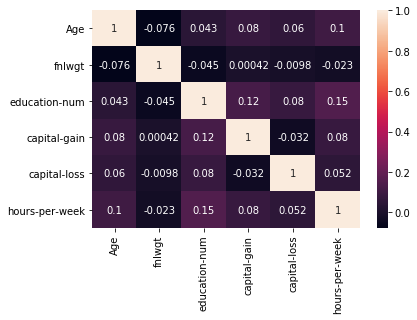

In [757]:
# Corelation through heatmap visualization
sns.heatmap(ds.corr(), annot=True)

# Pieplot

It is used to display the data in pie chart

([<matplotlib.patches.Wedge at 0x20b7e435dc8>,
 [Text(-0.749747581038629, 0.8049090412753013, ' State-gov'),
  Text(0.20715104280323415, -1.0803186777361267, ' Self-emp-not-inc'),
  Text(0.6790171906906309, -0.8654106855976551, ' Private'),
  Text(0.9338870744634232, -0.5812528986165563, ' Federal-gov'),
  Text(1.0470760484919803, -0.3370930860673652, ' Local-gov'),
  Text(1.0943704668290917, -0.11114531628582627, ' Self-emp-inc'),
  Text(1.0999988287251914, -0.0016052424139187521, ' Without-pay')])

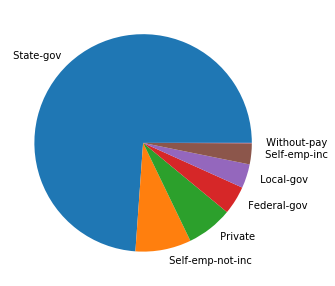

In [758]:
plt.figure(figsize=(10,5))
plt.pie(ds['workclass'].value_counts(), labels=ds.workclass.unique())

([<matplotlib.patches.Wedge at 0x20b7e493ec8>,
 [Text(-0.7801449305292097, 0.7754830026309891, ' <=50K'),
  Text(0.7801449305292096, -0.7754830026309892, ' >50K')])

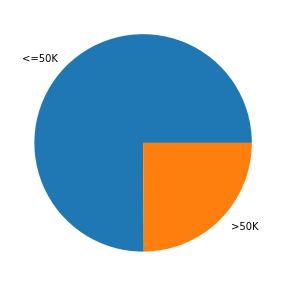

In [759]:
plt.figure(figsize=(10,5))
plt.pie(ds['Goal'].value_counts(), labels=ds.Goal.unique())

In [760]:
ds.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Goal
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [761]:
le = LabelEncoder()
for i in ds_cat.columns:
    ds[i] = le.fit_transform(ds[i])

In [762]:
ds.head(30)

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Goal
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [763]:
ds.dtypes

Age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
Goal              int32
dtype: object

# Plotting Outliers

# Univariate Analysis

In [764]:
collist = ds.columns.values
collist

array(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Goal'], dtype=object)

In [765]:
ncols = 15
nrows = 15

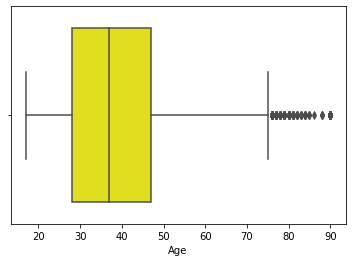

In [766]:
sns.boxplot(ds['Age'], color='yellow')
plt.show()

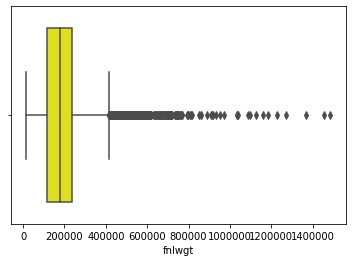

In [767]:
sns.boxplot(ds['fnlwgt'], color='yellow')
plt.show()

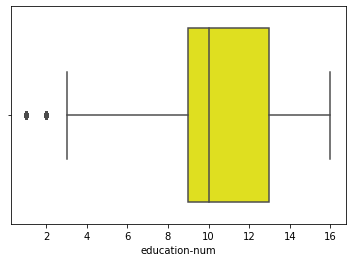

In [768]:
sns.boxplot(ds['education-num'], color='yellow')
plt.show()

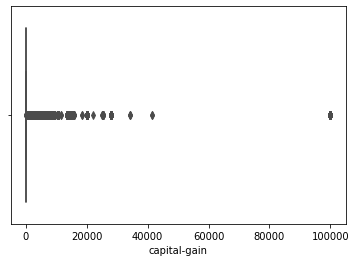

In [769]:
sns.boxplot(ds['capital-gain'], color='yellow')
plt.show()

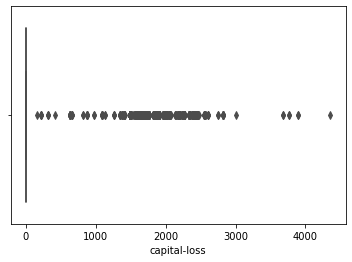

In [770]:
sns.boxplot(ds['capital-loss'], color='yellow')
plt.show()

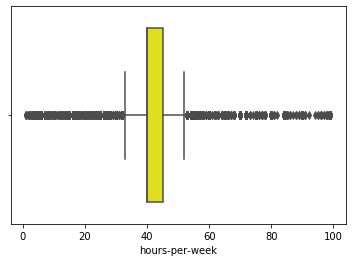

In [771]:
sns.boxplot(ds['hours-per-week'], color='yellow')
plt.show()

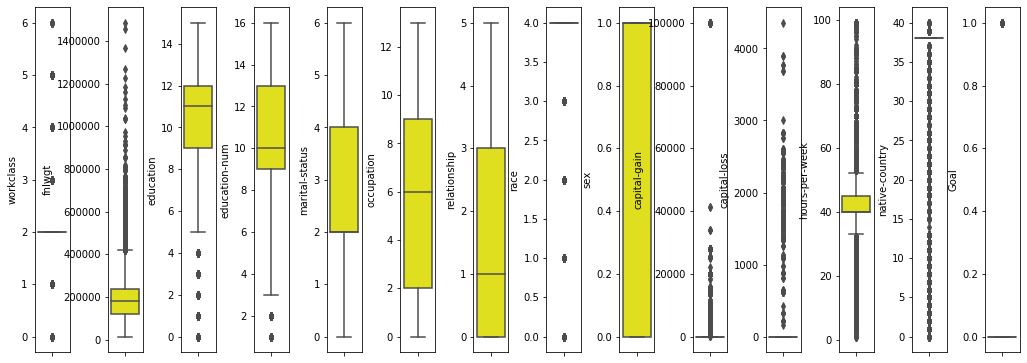

In [772]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Checking the skewness by distribution plot

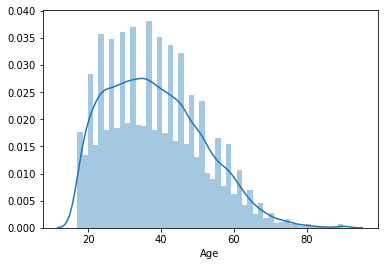

In [773]:
sns.distplot(ds['Age'])
plt.show()

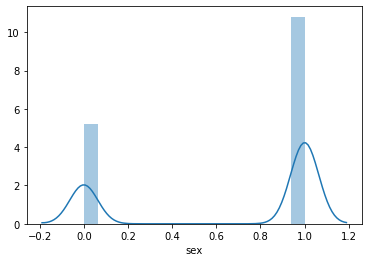

In [774]:
sns.distplot(ds['sex'])
plt.show()

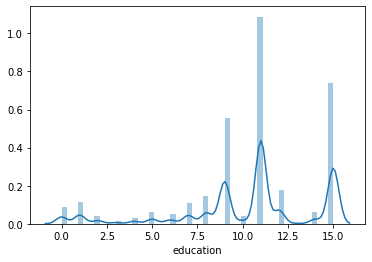

In [775]:
sns.distplot(ds['education'])
plt.show()

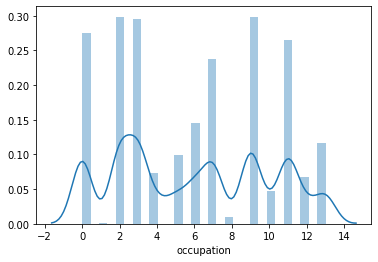

In [776]:
sns.distplot(ds['occupation'])
plt.show()

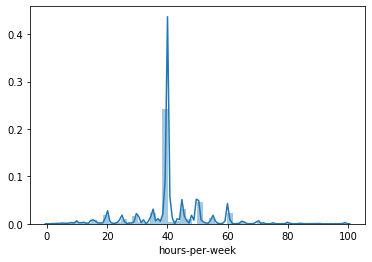

In [777]:
sns.distplot(ds['hours-per-week'])
plt.show()

# Violinplot

Violin plot shows where the maximum values of the column lies

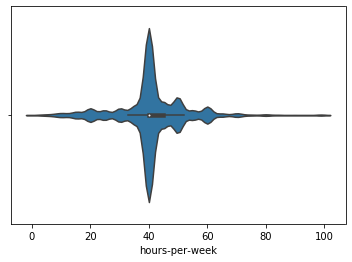

In [778]:
sns.violinplot(ds['hours-per-week'])
plt.show()

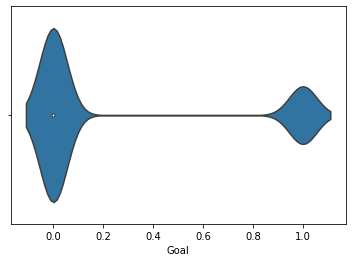

In [779]:
sns.violinplot(ds['Goal'])
plt.show()

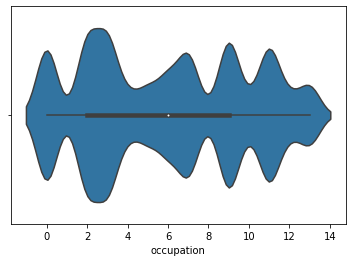

In [780]:
sns.violinplot(ds['occupation'])
plt.show()

# Bivariate Analysis

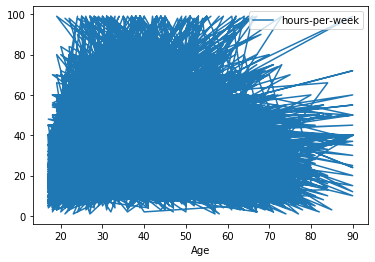

In [781]:
ds.plot(x='Age', y='hours-per-week', kind='line')
plt.show()

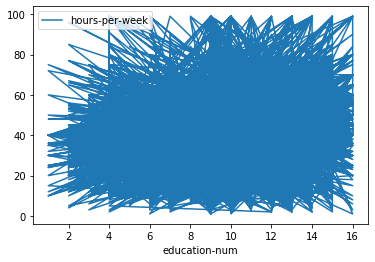

In [782]:
ds.plot(x='education-num', y='hours-per-week', kind='line')
plt.show()

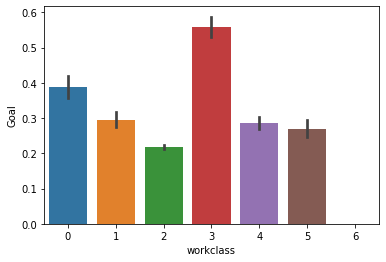

In [783]:
sns.barplot(x='workclass', y='Goal', data=ds)
plt.show()

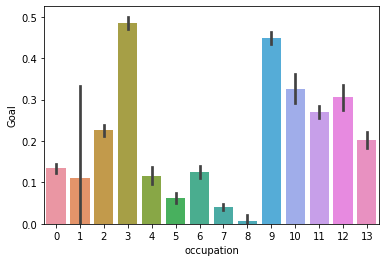

In [784]:
sns.barplot(x='occupation', y='Goal', data=ds)
plt.show()

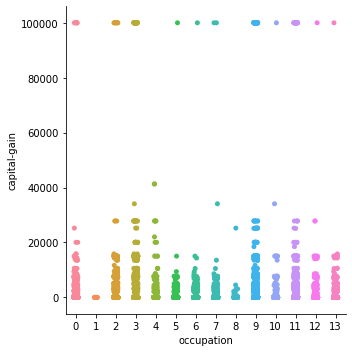

In [785]:
sns.catplot(x='occupation', y='capital-gain', data=ds)
plt.show()

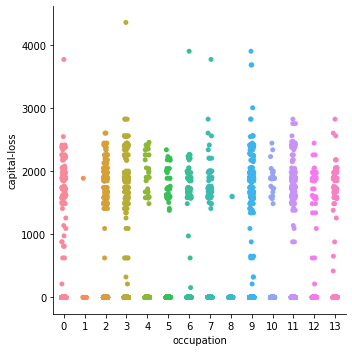

In [786]:
sns.catplot(x='occupation', y='capital-loss', data=ds)
plt.show()

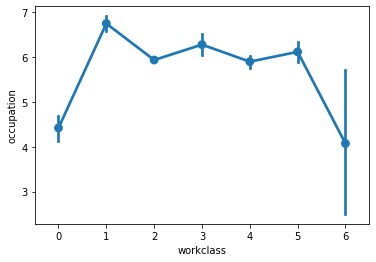

In [787]:
sns.pointplot(x='workclass', y='occupation', data=ds)
plt.show()

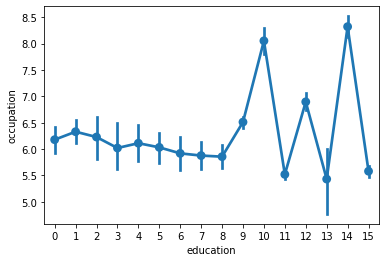

In [788]:
sns.pointplot(x='education', y='occupation', data=ds)
plt.show()

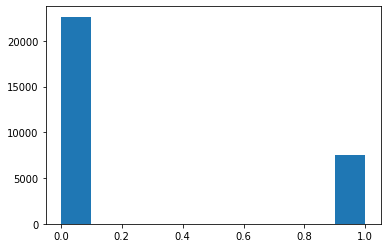

In [789]:
plt.hist(ds['Goal'])
plt.show()

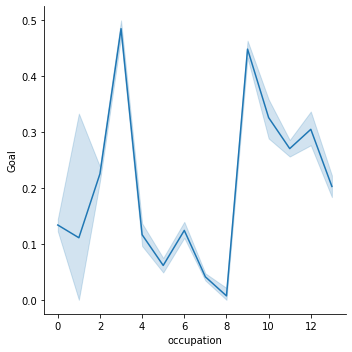

In [790]:
sns.relplot(x='occupation', y='Goal', data=ds, kind="line")

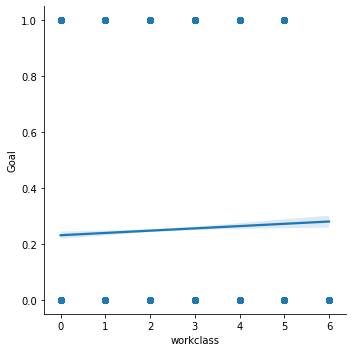

In [791]:
sns.lmplot(x='workclass', y='Goal', data=ds)

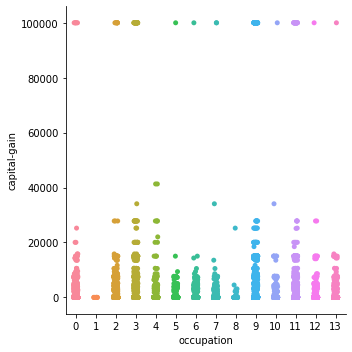

In [792]:
sns.catplot(x='occupation', y='capital-gain', data=ds, split=True)

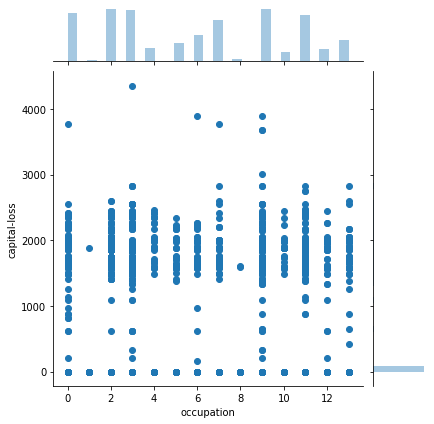

In [793]:
sns.jointplot(x='occupation', y='capital-loss', data=ds)

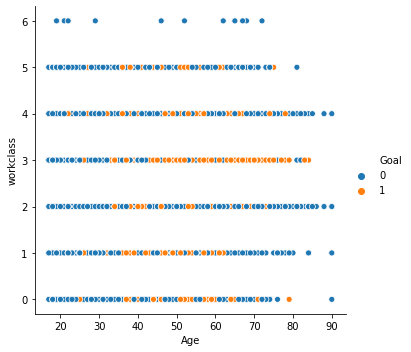

In [794]:
sns.relplot(x='Age', y='workclass', data=ds, hue='Goal')

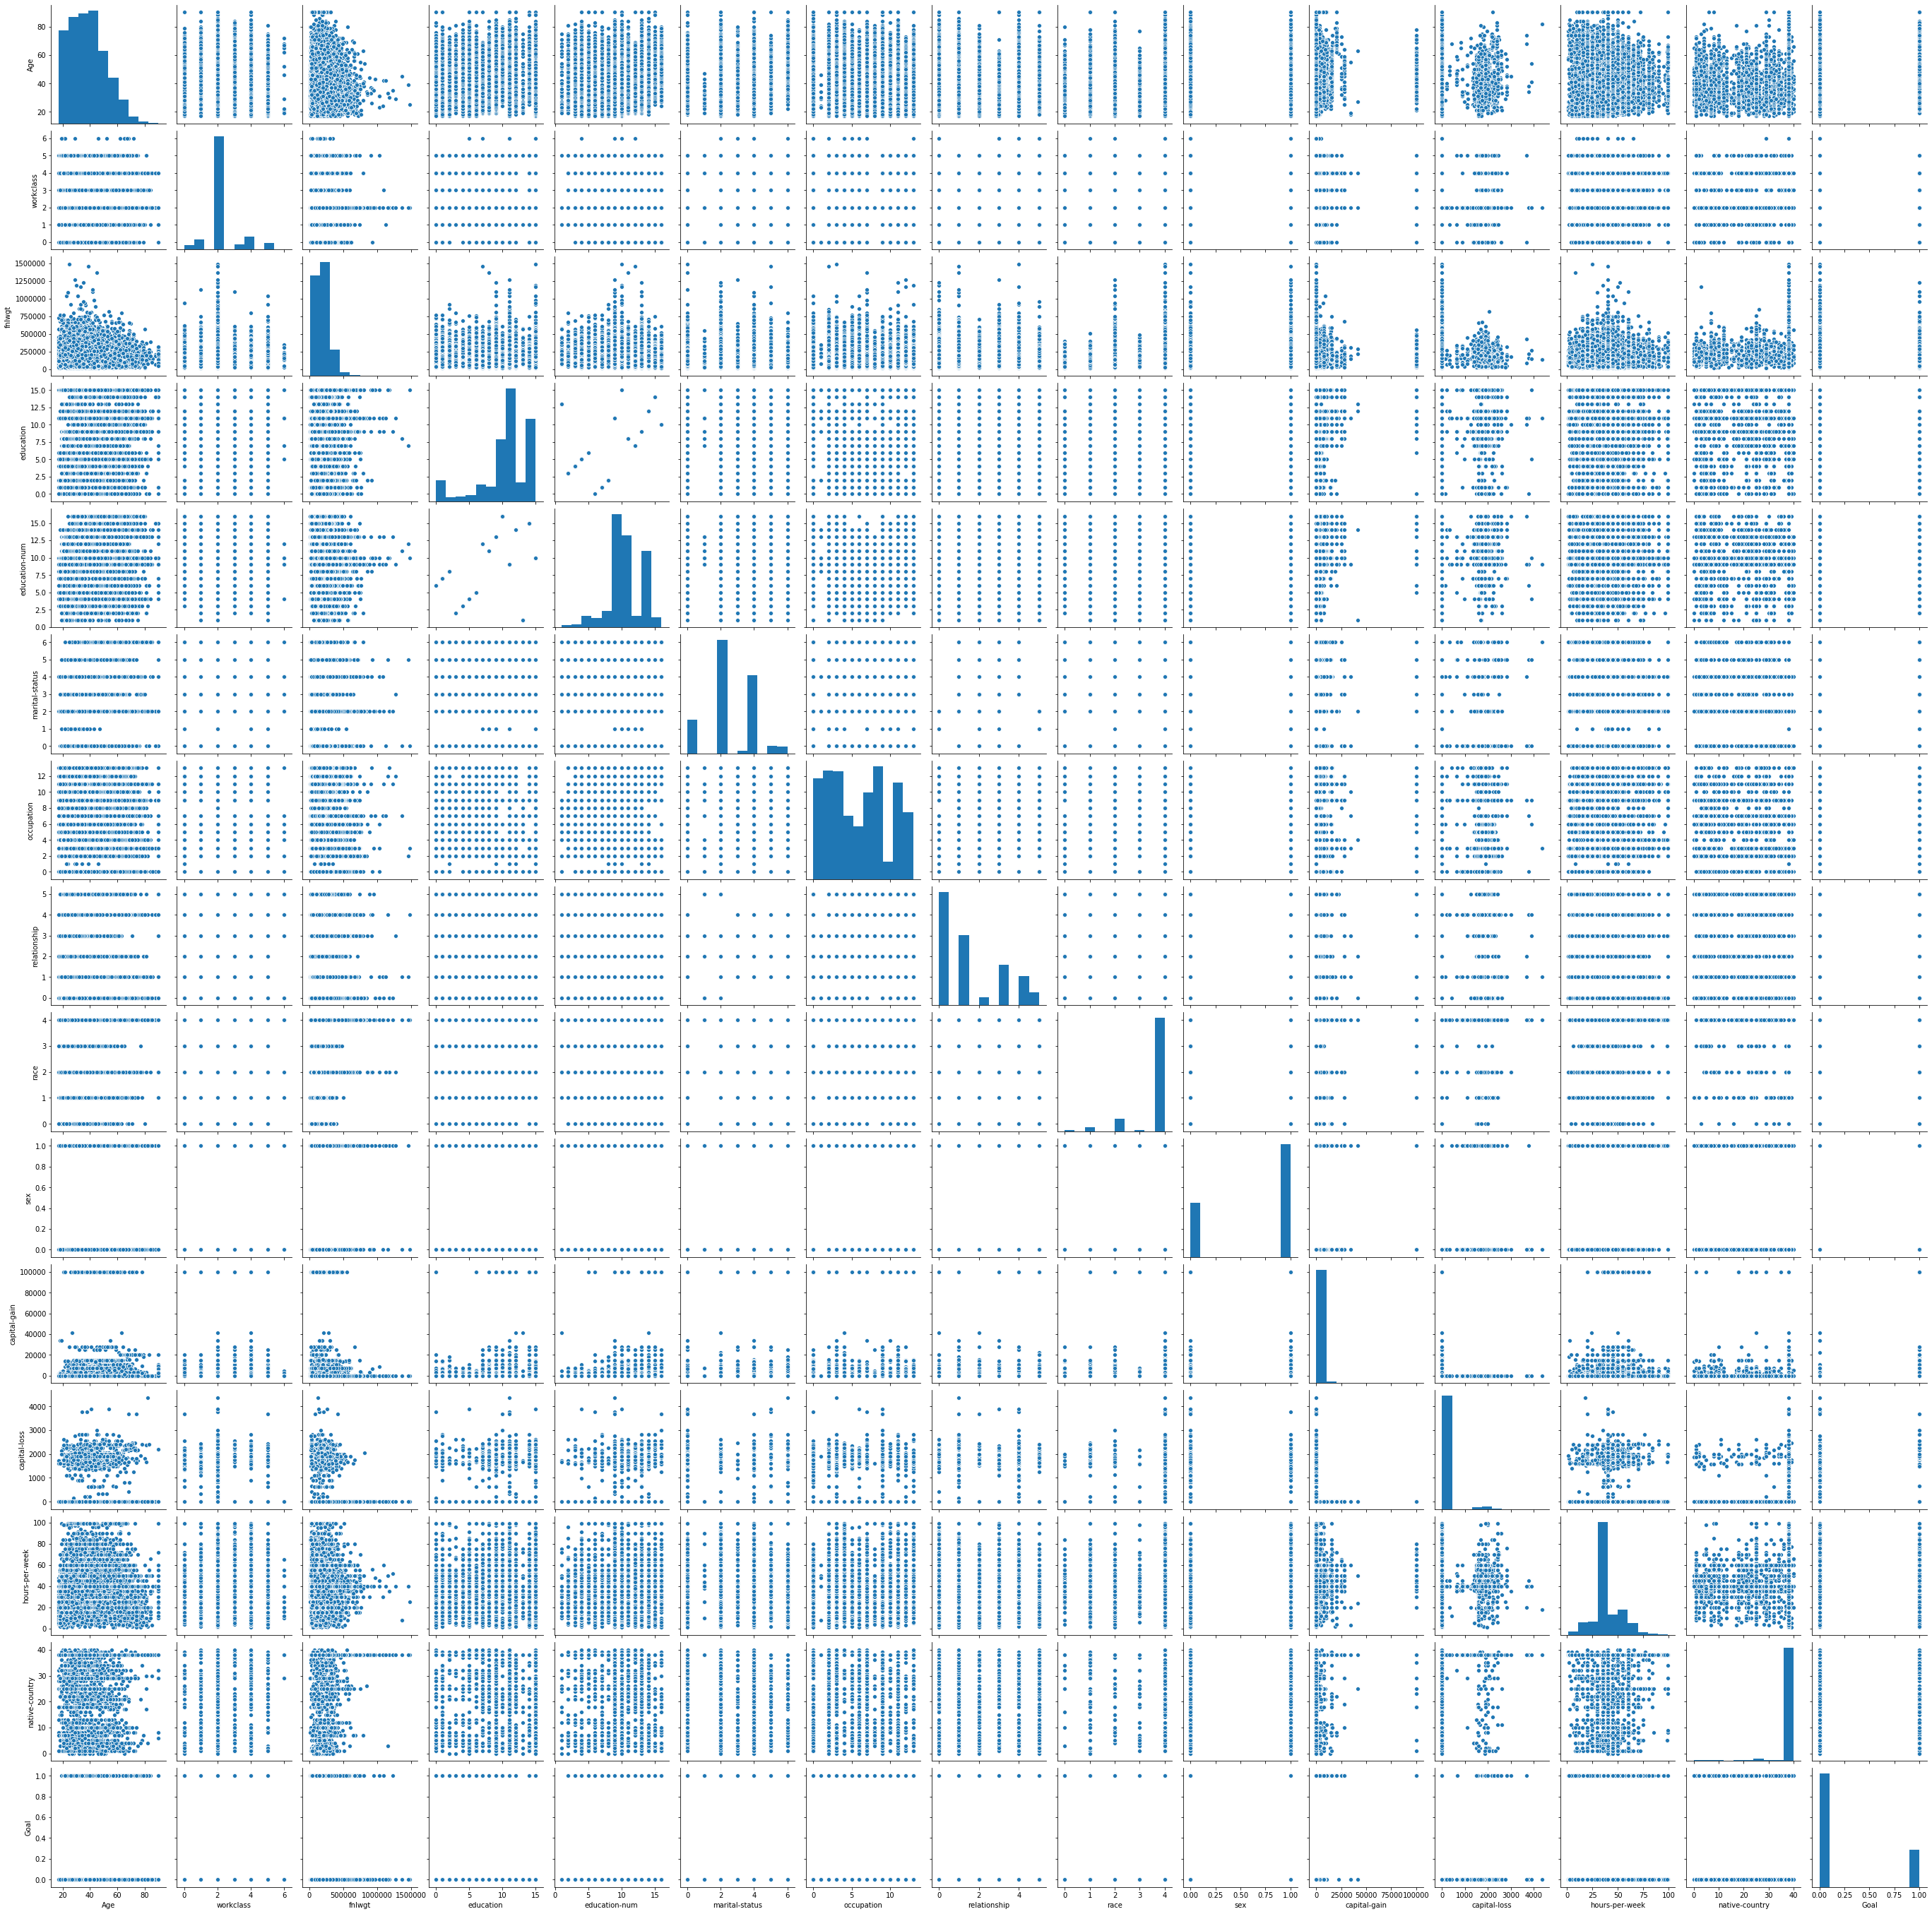

In [795]:
sns.pairplot(data=ds)

In [796]:
# Checking the skewness of the data
ds.skew()

Age                0.528971
workclass          1.154191
fnlwgt             1.460055
education         -0.945132
education-num     -0.302845
marital-status    -0.008691
occupation         0.110359
relationship       0.820080
race              -2.506645
sex               -0.750886
capital-gain      11.898104
capital-loss       4.524409
hours-per-week     0.332386
native-country    -4.183103
Goal               1.160644
dtype: float64

In [797]:
ds['Goal'].unique()

array([0, 1])

In [798]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (30139, 15)
After removing zscore:  (25741, 15)


In [799]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Goal'])
y = ds_final['Goal']

In [800]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [801]:
x.shape

(25741, 14)

In [802]:
x.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.075250,2.970229,-1.148557,-0.359718,1.207658,0.938777,-1.462636,-0.274591,0.338942,0.702826,0.671473,-0.037874,-0.038996,0.19037
1,0.929348,1.913380,-1.087306,-0.359718,1.207658,-0.384466,-0.722491,-0.899105,0.338942,0.702826,-0.247923,-0.037874,-2.545680,0.19037
2,-0.002395,-0.200317,0.311446,0.164706,-0.462281,-1.707708,-0.229060,-0.274591,0.338942,0.702826,-0.247923,-0.037874,-0.038996,0.19037
3,1.162284,-0.200317,0.513065,-2.457414,-1.297250,-0.384466,-0.229060,-0.899105,-3.004494,0.702826,-0.247923,-0.037874,-0.038996,0.19037
4,-0.080040,-0.200317,1.040085,0.426918,1.625143,-0.384466,-0.722491,2.223464,0.338942,-1.422828,-0.247923,-0.037874,-0.038996,0.19037


In [803]:
y.unique()

array([0, 1])

In [804]:
x.skew()

Age                0.443464
workclass          1.183431
fnlwgt             0.628394
education         -0.965899
education-num     -0.134531
marital-status    -0.039103
occupation         0.122459
relationship       0.787963
race              -2.641253
sex               -0.720044
capital-gain       4.841977
capital-loss      28.895041
hours-per-week    -0.284042
native-country    -5.345684
dtype: float64

In [805]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [806]:
x.skew()

Age               0.443464
workclass        -0.423953
fnlwgt            0.275654
education        -0.965899
education-num    -0.134531
marital-status   -0.039103
occupation        0.122459
relationship     -0.300438
race             -2.641253
sex              -0.720044
capital-gain      0.170678
capital-loss     -0.617285
hours-per-week   -0.284042
native-country   -5.345684
dtype: float64

In [807]:
x.replace(np.NaN, 0, inplace=True)

# Classification algorithm for dataset: with target column 'Goal'

In [808]:
y.unique()

array([0, 1])

In [809]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [810]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [811]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [812]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  46  is:  0.839774713536609
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [1 0 1 ... 0 0 1]


Accuracy score:  0.839774713536609


cross val score:  0.8265026365220539


[0.         0.09045477 1.        ] [0.         0.59633827 1.        ] [2 1 0]
roc auc score:  0.7529417505719678


classification report:                precision    recall  f1-score   support

           0       0.89      0.91      0.90      4002
           1       0.65      0.60      0.62      1147

    accuracy                           0.84      5149
   macro avg       0.77      0.75      0.76      5149
weighted avg       0.84      0.84      0.84      5149



[[3640  362]
 [ 463  684]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************** SVC ***

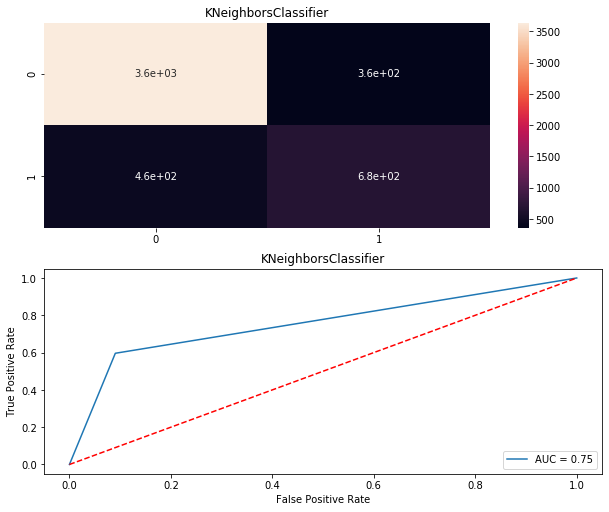

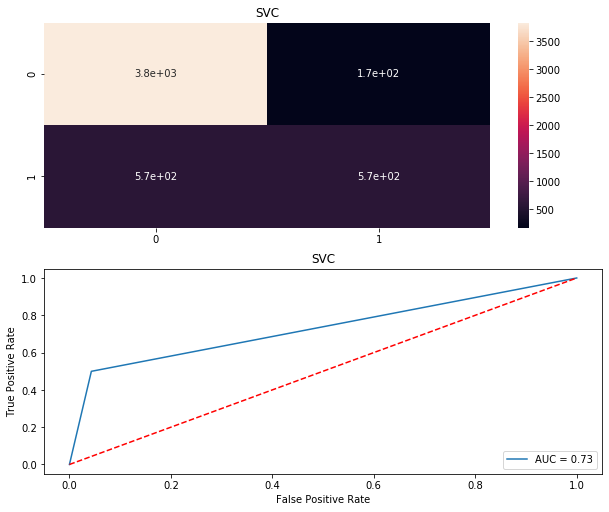

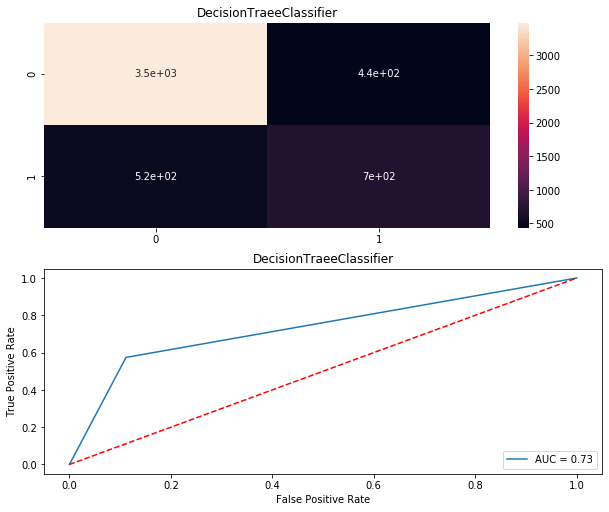

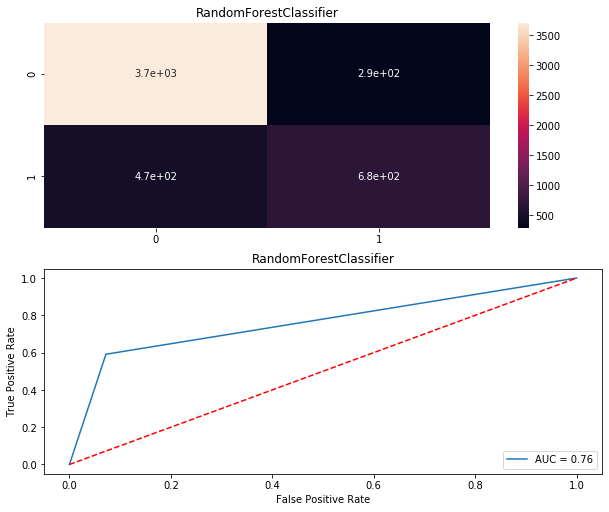

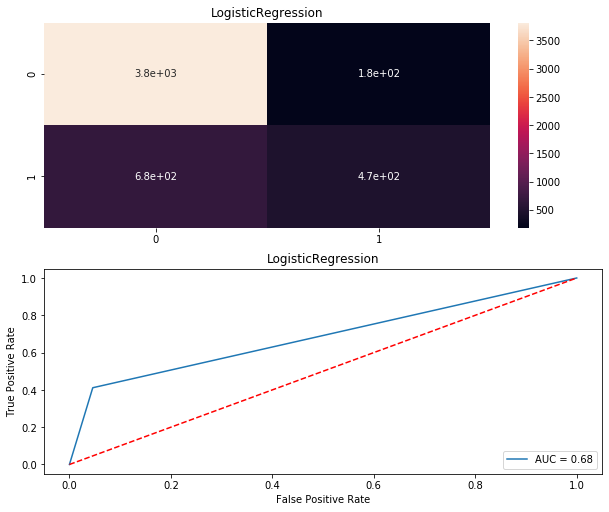

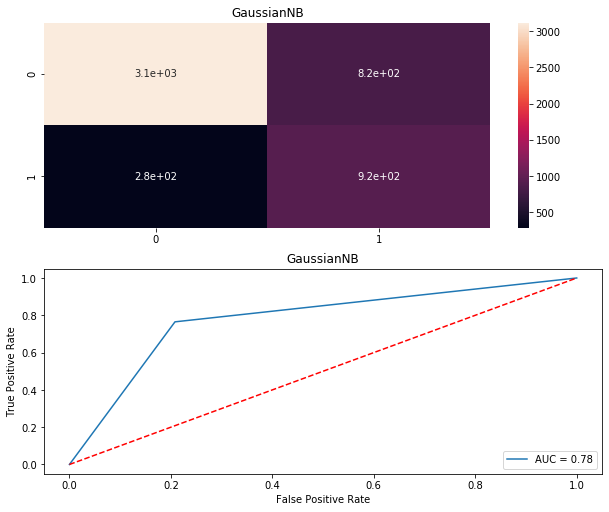

In [813]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [814]:
# Displaying teh data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,83.977471,82.650264,75.294175,46
1,SVC,85.492329,84.491683,72.816785,46
2,DecisionTraeeClassifier,81.394446,80.731155,73.130622,95
3,RandomForestClassifier,85.298116,84.413986,75.957161,46
4,LogisticRegression,83.317149,82.145230,68.276564,46
5,GaussianNB,78.558943,77.137686,77.841582,64


In [815]:
# Using the best model for gridsearchcv 

parameters = { "C": [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear', 'poly']}
gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [816]:
gsc

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [817]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=46, test_size = 0.20)
svc = SVC(C=1.0, gamma='scale', kernel='rbf', )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[1 0 1 ... 0 0 1]


Best model is selected to determine whether a person makes over 50K a year

In [818]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_census.csv')

accuracy score:  0.854923286074966
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4002
           1       0.77      0.50      0.61      1147

    accuracy                           0.85      5149
   macro avg       0.82      0.73      0.76      5149
weighted avg       0.85      0.85      0.84      5149

Confusion_matrix:  [[3829  173]
 [ 574  573]]
cross val score:  0.8449168307420735
roc auc score:  0.7281678472010724
AxesSubplot(0.125,0.808774;0.62x0.0712264)





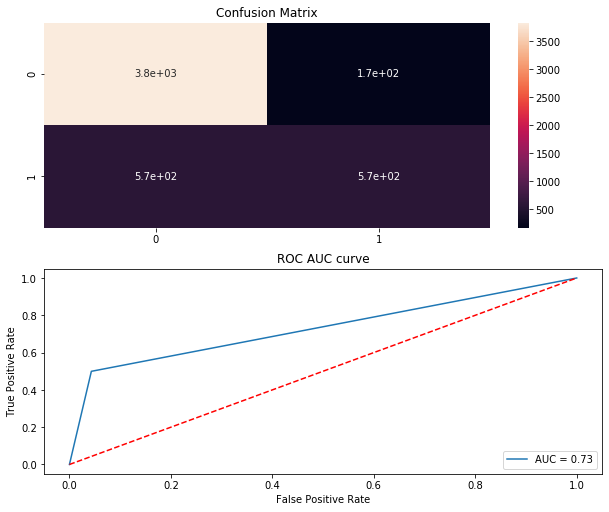

In [819]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [820]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(svc, 'project_census.pkl')
#clf = joblib.load('project_census.pkl')
#clf.predict(x_test)

['project_census.pkl']